C:\Users\ram15\AppData\Roaming\Python\Python39\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


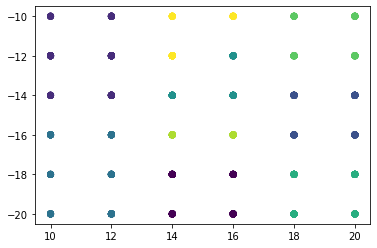

,data_index,cluster
5,"(12, -20)",3
12,"(12, -18)",3
21,"(10, -18)",3
25,"(12, -18)",3
26,"(12, -18)",3
...,...,...
976,"(12, -20)",3
977,"(12, -16)",3
982,"(12, -18)",3
992,"(10, -20)",3


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

annotations = pd.read_csv("./vals.txt", sep = " |,")
annotations.columns=['fname', 'x1', 'y1', 'x2', 'y2', 'class']
annotations['w'] = annotations['x2'] - annotations['x1']
annotations['h'] = annotations['y1'] - annotations['y2']

widths = annotations['w'].tolist()
heights = annotations['h'].tolist()

x = list(zip(widths,heights))

predictor =  KMeans(n_clusters = 9, random_state=6969)

fit = predictor.fit(x)
pred = predictor.fit_predict(x)
colorops = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b']
coloropsgray = [i/10 for i in list(range(1,11))]
colors = []
for i in pred:
  colors.append(coloropsgray[i])
plt.scatter(widths, heights, c=colors)
plt.show()

cluster_map = pd.DataFrame()
cluster_map['data_index'] = x
cluster_map['cluster'] = fit.labels_
cluster_map[cluster_map.cluster == 3]